[[11169     0     0     0     0     0     0     0     0     0]
 [    0    47    15     5     2     3   212    76     0     0]
 [    0    22    89     2     0     0   204    76     0     0]
 [    0     3    14  3177    16     1   287    69     0     3]
 [    0     0     0    39   152     1    28    10     0     3]
 [    0     2     0     6     1  1569   405   115     0     0]
 [    0     1     5    88    25   133  5713   796     1    10]
 [    0     1     4    21    11    10  1789   533     0     1]
 [    0     0     0     0     0     0    20     0     5     0]
 [    0     1     0    12     1     0   107    48     1  7909]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       0.61      0.13      0.22       360
           2       0.70      0.23      0.34       393
           3       0.95      0.89      0.92      3570
           4       0.73      0.65      0.69       233
           5       0.91      0.75      0.82 

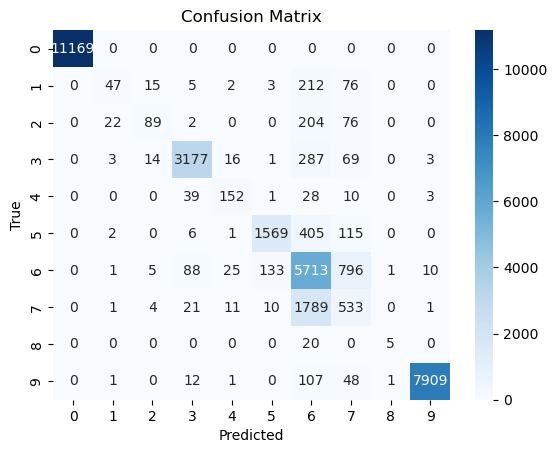

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1: Memuat dataset
data = pd.read_csv('UNSW_NB15_training-set.csv')

# Langkah 2: Preprocessing
# Mengkodekan fitur kategorikal
categorical_features = ['proto', 'service', 'state']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Simpan encoder untuk penggunaan di masa mendatang

# Mengkodekan kolom target 'attack_cat'
label_encoder = LabelEncoder()
data['attack_cat'] = label_encoder.fit_transform(data['attack_cat'])

# Menangani nilai NaN
data.dropna(inplace=True)

# Skalasi fitur numerik
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('attack_cat')  # Jangan skalakan kolom target 'attack_cat'
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Langkah 3: Memisahkan data
X = data.drop(['attack_cat', 'id'], axis=1)  # Asumsikan 'id' adalah kolom yang tidak relevan
y = data['attack_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 4: Setup model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Langkah 5: Pelatihan dan Evaluasi Model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Menampilkan confusion matrix dan classification report
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))

# Langkah 6: Visualisasi
# Confusion Matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
